# Mirage mazes
In this notebook we will try and create a mirage maze. A mirage maze is a maze with a few 'mirage' walls superposed onto it. To create a mirage maze, we take an already existing maze and try and add walls. For every pathway already present in the maze we convert this to an apparent (mirage) wall with probability p. This provides an additional hindrance to the solving agents in that they will have to pay a small fee to verify if the wall is a real wall or a mirage wall. 

In [11]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze, INF

In [25]:
def Mirage(maze, p):
    """
    maze is the original maze onto which we superpose the mirage layer
    p is the probability with which we add an apparent wall
    """
    perceived_maze = Maze(maze.num_rows, maze.num_columns)
    for x in range(0, maze.num_columns):
        for y in range(0, maze.num_rows):
            # Copy the contents of the original maze
            perceived_maze.grid[x][y].neighbors = dict.copy(maze.grid[x][y].neighbors)
            
            # For each cardinal direction, check if a path exists in that direction from a particular node
            # If there is a path, then 
            if maze.grid[x][y].neighbors['W'] != INF:
                if(random.uniform(0, 1) <= p):
                    perceived_maze.add_path((x, y), 'W', INF)
                    
            if maze.grid[x][y].neighbors['E'] != INF:
                if(random.uniform(0, 1) <= p):
                    perceived_maze.add_path((x, y), 'E', INF)
            
            if maze.grid[x][y].neighbors['N'] != INF:
                if(random.uniform(0, 1) <= p):
                    perceived_maze.add_path((x, y), 'N', INF)
            
            if maze.grid[x][y].neighbors['S'] != INF:
                if(random.uniform(0, 1) <= p):
                    perceived_maze.add_path((x, y), 'S', INF)
    return perceived_maze

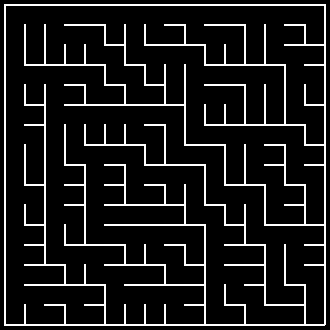

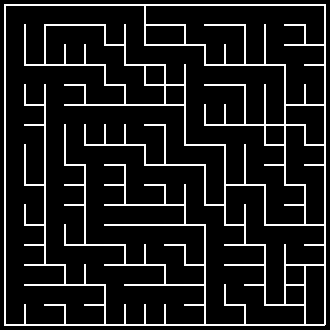

In [29]:
# Load up a pregenerated maze and add the mirage layer onto it
maze = Maze()
maze.load("BinaryTree_16x16.maze")
mirage_maze = Mirage(maze, 0.1)
display(maze.draw(cell_width=20))
display(mirage_maze.draw(cell_width = 20))

As we can see the mirage maze clearly has extra walls that have been superposed onto the original maze. Let us consider the top row. To get to the top right corner a solving agent must find out that the wall in its path is a 'mirage' and doesn't actually exist. This will be challenging to solve algorithmically, as solving agents only possess local vision, that is they can only see a subset of the maze at any given point in time. To check the effects of the mirage layer, checking the validity of a wall will come with a slight cost.